<a href="https://colab.research.google.com/github/MRnickRuss/AI/blob/main/Pr2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №2. Использование глубоких нейронных сетей для решения задач регрессии и классификации



**Ссылка на код с пары:**
https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A?usp=sharing


## Задание №1. Обучение модели ИНС для решения задачи регрессии



Постройте глубокую нейронную сеть для предсказания цен на недвижимость в городе Бостон, используя датасет датасет boston_housing_price

[Описание датасета](https://www.hackersrealm.net/post/boston-house-price-prediction-analysis-using-python)

#### 1.1. Загружаем исходные данные:

In [1]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

data, target

(array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 31.6, 23.3, 19.6, 1

#### 1.2. Проектируем архитектуру для этой задачи

In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

%matplotlib inline


x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)

print(x_train[0])

#scaler = StandardScaler()  # Стандартизация по среднему и стандартному отклонению
scaler = MinMaxScaler()  # Масштабирование в диапазон 0-1

scaler.fit(data)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Сохранение модели scaler
import pickle

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print(x_train.shape)
print(x_test.shape)
print(x_train)
print(x_test)

[3.5809e-01 0.0000e+00 6.2000e+00 1.0000e+00 5.0700e-01 6.9510e+00
 8.8500e+01 2.8617e+00 8.0000e+00 3.0700e+02 1.7400e+01 3.9170e+02
 9.7100e+00]
(404, 13)
(102, 13)
[[0.00395381 0.         0.21041056 ... 0.5106383  0.98688789 0.22019868]
 [0.00171339 0.         0.37939883 ... 0.70212766 0.94966968 0.22488962]
 [0.00120232 0.3        0.1638563  ... 0.42553191 0.98575319 0.26628035]
 ...
 [0.00162594 0.         0.35007331 ... 0.55319149 0.99397347 0.23647903]
 [0.0025059  0.         0.23643695 ... 0.56382979 0.98951031 0.47102649]
 [0.00149286 0.         0.13159824 ... 0.42553191 1.         0.35761589]]
[[6.84726112e-04 0.00000000e+00 1.01906158e-01 ... 4.57446809e-01
  9.45307378e-01 1.54801325e-01]
 [1.03697791e-01 0.00000000e+00 6.46627566e-01 ... 8.08510638e-01
  9.22462051e-01 2.15231788e-01]
 [1.21310718e-03 0.00000000e+00 4.92302053e-01 ... 4.04255319e-01
  9.92031873e-01 2.41997792e-01]
 ...
 [1.60728552e-03 2.50000000e-01 1.71187683e-01 ... 7.55319149e-01
  9.95486409e-01 3.15

In [3]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential([
    Dense(25, input_shape=(13,), activation='relu'),
    Dense(12, activation='relu'),
    Dense(1, activation='relu')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                350       
                                                                 
 dense_1 (Dense)             (None, 12)                312       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 675 (2.64 KB)
Trainable params: 675 (2.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 1.3. Компилируем модель ИНС

Подберите нужную функцию потерь и метрику.

In [4]:
model.compile(optimizer='Adam', loss='mse', metrics='mae')

#### 1.4. Обучаем модель ИНС

In [5]:
history = model.fit(x_train, y_train, epochs=24, validation_data=(x_test, y_test))

Epoch 1/24
13/13 [==============================] - 3s 51ms/step - loss: 583.5312 - mae: 22.3377 - val_loss: 557.0201 - val_mae: 21.8105
Epoch 2/24
13/13 [==============================] - 0s 10ms/step - loss: 569.4588 - mae: 22.0072 - val_loss: 541.4343 - val_mae: 21.4405
Epoch 3/24
13/13 [==============================] - 0s 14ms/step - loss: 553.7848 - mae: 21.6169 - val_loss: 524.3757 - val_mae: 21.0245
Epoch 4/24
13/13 [==============================] - 0s 12ms/step - loss: 536.0164 - mae: 21.1795 - val_loss: 504.7111 - val_mae: 20.5343
Epoch 5/24
13/13 [==============================] - 0s 23ms/step - loss: 515.0824 - mae: 20.6510 - val_loss: 481.4212 - val_mae: 19.9372
Epoch 6/24
13/13 [==============================] - 0s 23ms/step - loss: 490.2888 - mae: 19.9806 - val_loss: 453.2123 - val_mae: 19.1891
Epoch 7/24
13/13 [==============================] - 0s 13ms/step - loss: 460.1264 - mae: 19.1708 - val_loss: 420.3682 - val_mae: 18.2843
Epoch 8/24
13/13 [=======================

#### 1.6. Делаем предсказания на тестовых данных

In [6]:
predict = model.predict(x_test)

4/4 [==============================] - 0s 4ms/step


#### 1.7. Вычисляем метрику качества на тестовых данных

In [7]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predict, y_test)

6.9689000821581075

#### 1.8. Строим график обучения

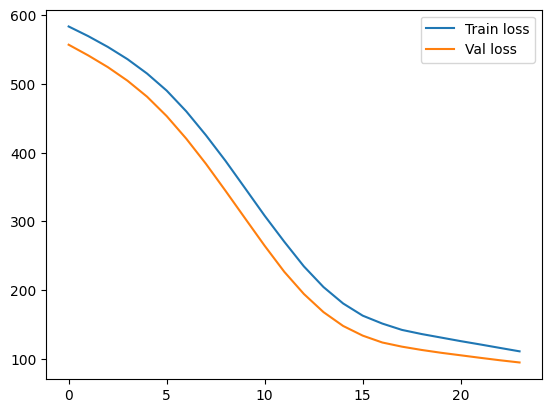

In [8]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()
plt.show()

#### 1.9. Построение графического интерфейса в Gradio Проверка обученной модели пользовательскими данными

In [9]:
def preprocess_input(features, scale_model="scaler.pkl"):
  try:
    # Преобразование в NumPy массив
    features = np.array(features)

    # Проверка на пустой массив
    if not features.size:
      raise ValueError("Пустой массив признаков!")

    # Изменение размерности массива (8,) -> (1, 8)
    features = features.reshape(1, -1)

    # Загрузка модели масштабирования
    with open(scale_model, "rb") as f:
      scaler = pickle.load(f)

    # Масштабирование признаков
    features = scaler.transform(features)

  except Exception as e:
    raise ValueError(f"Ошибка при предобработке: {e}")

  return features

In [10]:
def predict_price(*features):
  try:
    # Предобработка входных признаков
    features = preprocess_input(features)

    # Прогнозирование цены
    prediction = model.predict(features, verbose=0)

    # Проверка на ошибки прогнозирования
    if np.isnan(prediction).any():
      raise ValueError("Ошибка при прогнозировании: NaN")

  except Exception as e:
    raise ValueError(f"Ошибка при прогнозировании: {e}")

  # Возвращение прогнозируемой цены
  # (умножение на 1000 для отображения в тысячах долларов)
  return f"{prediction[0][0] * 1000}"

In [11]:
!pip install gradio --use-deprecated=legacy-resolver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.9/315.9 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 944.4 kB/s 

#### 2. Проверка обученной модели пользовательскими данными

In [12]:
import gradio as gr

# Интерфейс Gradio
interface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Slider(label="crim", minimum=0, maximum=100, step=0.01, value=0.35),
        gr.Slider(label="zn", minimum=0, maximum=100, step=0.01, value=0.0),
        gr.Slider(label="indus", minimum=0, maximum=100, step=0.01, value=6.2),
        gr.Slider(label="chas", minimum=0, maximum=1, step=1, value=1.0),
        gr.Slider(label="nox", minimum=0, maximum=1, step=0.01, value=0.5),
        gr.Slider(label="rm", minimum=1, maximum=10, step=0.1, value=6.9),
        gr.Slider(label="age", minimum=0, maximum=100, step=1, value=88),
        gr.Slider(label="dis", minimum=0.5, maximum=10, step=0.1, value=2.86),
        gr.Slider(label="tax", minimum=10, maximum=500, step=5, value=8),
        gr.Slider(label="ptatio", minimum=1, maximum=100, step=0.1, value=307),
        gr.Slider(label="b", minimum=10, maximum=1000, step=5, value=17.4),
        gr.Slider(label="istat", minimum=0.1, maximum=100, step=0.1, value=391),
        gr.Slider(label="medv", minimum=10, maximum=100, step=1, value=9.7),
    ],
    # Обновление при каждом изменении
    # live=True,
    outputs=gr.Text(label="Predicted Price ($)"),
)

# Запуск интерфейса
interface.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://b0bde77385251e43ea.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://b0bde77385251e43ea.gradio.live


## Задание №2.Обучение модели ИНС для решения задачи классификации



Порядок работы:

* 1. Собрать датасет из изображений, соответствующих не менее, чем 3 классам объектов (в
примере с пары были кошки, собаки и панды).


- 2. Для каждого класса должно быть собрано не менее 1000 изображений. Количество
изображений для каждого класса должно быть одинаковым.
Готовые датасеты можно скачать отсюда: https://www.kaggle.com/


- 3. Обучить модель глубокой нейронной сети для решения задачи классификации
изображений, по выбранным Вами классам. (В качестве примера приведён код с пары)
В конечном итоге Вы должны сохранить обученную модель для классификации
изображений, соответствующих тем классам, которые Вы выбрали, а затем воспользоваться этой моделью для предсказания классов на пользовательских изображениях.



> При выполнении заданий пробуйте использовать разные функции потерь,
методы оптимизации, функции активации и метрики ошибок.

### 1. Устанавливаем зависимости:

In [13]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### 2. Загружаем набор данных:

### 3. Указываем путь к набору данных:

In [15]:
# Собираем список путей к каждому изображению и перемешиваем их
imagePaths = sorted(list(paths.list_images("/content/gdrive/MyDrive/archive_2/Data")))
random.shuffle(imagePaths)

### 4. Загружаем набор данных и формируем общую выборку:

In [16]:
def load_images(imagePaths, compression_size = 32):
  """
  Функция для загрузки изображений и преобразования их в векторы признаков.

  Args:/content/gdrive/MyDrive/archive
    imagePaths: список путей к изображениям.
    compression_size: размер сжатия изображения

  Returns:
    data: список векторов признаков (сжатых изображений, преобразованных в векторы).
    labels: список меток классов.
  """

  data = []
  labels = []

  for imagePath in imagePaths:
    # Загрузка изображения
    image = cv2.imread(imagePath)

    # Изменение разрешения изображения (по умолчанию 32х32х3 -> 3072,)
    image = cv2.resize(image, (compression_size, compression_size)).flatten()

    # Добавление изображения в список
    data.append(image)

    # Извлечение метки класса из пути к изображению
    label = imagePath.split(os.path.sep)[-2]

    # Добавление метки в список
    labels.append(label)

  return data, labels

In [17]:
compression_size = 32
data, labels = load_images(imagePaths, compression_size)

#### 4.1. Нормализуем данные:

Масштабируем интенсивности пикселей в диапазон [0, 1], а также преобразуем данные в массивы NumPy для повышения производительности


In [18]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

#### 4.2. Формируем обучающую и валидационную выборки:

Разделяем данные на обучающую и валидационную выборки, используя 75% данных для обучения и оставшиеся 25% для валидации

In [19]:
(trainX, valX, trainY, valY) = train_test_split(
    data,
    labels,
    test_size=0.25,
    random_state=42)

In [20]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
valY = lb.transform(valY)

### 5. Создание модели:

#### 5.1. Определим архитектуру модели с помощью Keras:

In [21]:
input_shape = (compression_size * compression_size * 3,)

#### 5.2. Установим значение параметров скорости обучения и общего числа эпох


In [22]:
model = Sequential()
model.add(Dense(1024, input_shape=input_shape, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(len(lb.classes_), activation="softmax"))

#### 5.3. Компилируем модель:

In [23]:
INIT_LR = 0.0001
EPOCHS = 4

opt = Adam(learning_rate=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

### 6. Обучение модели искусственной нейронной сети:

#### 6.1. Добавим колбэки для сохранения лучшей модели по валидационной точности и остановки обучения, в случае, если модель перестала обучаться:

In [24]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=5) # Остановка обучения, если
                                             # валидационная точность не
                                             # улучшается в течение 5 эпох
checkpoint = ModelCheckpoint(filepath="best_model.h5",
                             monitor="val_accuracy",
                             save_best_only=True,
                             verbose=0) # Сохранение модели
                                         # только при улучшении
                                         # валидационной точности

#### 6.2. Запустим процесс обучения модели:

In [25]:
H = model.fit(trainX, trainY,
              validation_data=(valX, valY),
              epochs=EPOCHS,
              batch_size=100,
              callbacks=[early_stopping, checkpoint])

Epoch 1/4
23/23 [==============================] - 4s 122ms/step - loss: 0.7076 - accuracy: 0.7163 - val_loss: 0.4262 - val_accuracy: 0.8715
Epoch 2/4


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


23/23 [==============================] - 3s 119ms/step - loss: 0.3283 - accuracy: 0.8944 - val_loss: 0.2766 - val_accuracy: 0.9245
Epoch 3/4
23/23 [==============================] - 2s 79ms/step - loss: 0.2177 - accuracy: 0.9408 - val_loss: 0.2066 - val_accuracy: 0.9417
Epoch 4/4
23/23 [==============================] - 2s 75ms/step - loss: 0.1666 - accuracy: 0.9558 - val_loss: 0.1782 - val_accuracy: 0.9536


#### 6.3. Загружаем лучшую модель:

In [26]:
from keras.models import load_model

model = load_model("/content/best_model.h5")

### 7. Оценка точности:

#### 7.1. Выведем отчет классификации

In [27]:
predictions = model.predict(valX, batch_size=32)
print(classification_report(valY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))


24/24 [==============================] - 1s 22ms/step
              precision    recall  f1-score   support

      Images       0.00      0.00      0.00         2
       anime       0.98      0.96      0.97       244
     cartoon       0.94      0.96      0.95       273
       human       0.94      0.95      0.95       236

    accuracy                           0.95       755
   macro avg       0.72      0.72      0.72       755
weighted avg       0.95      0.95      0.95       755



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 7.2. Выведем матрицу ошибок

24/24 [==============================] - 0s 9ms/step


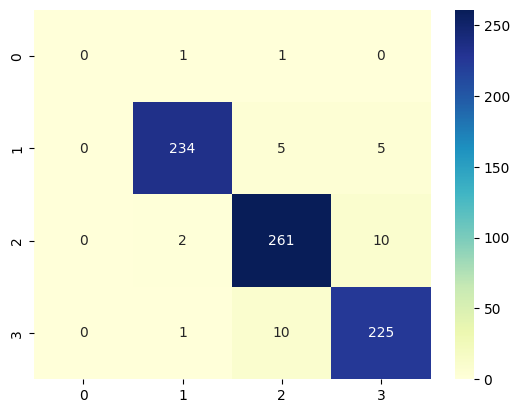

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Получим прогнозы по валидационным даннным
Y_pred = model.predict(valX, batch_size=32)

# Преобразуем вероятности в метки классов
Y_pred = Y_pred.argmax(axis=1)
valY = valY.argmax(axis=1)

# Вычисляем матрицу ошибок
conf_mat = confusion_matrix(valY, Y_pred)

# Визуализируем матрицу ошибок
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

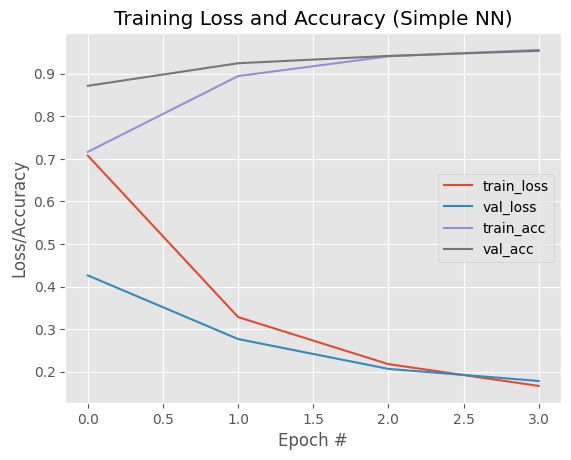

In [29]:
# строим графики потерь и точности
N = np.arange(0, len(H.history["loss"]))
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot.png')

### 8. Сохранение модели и меток классов:

In [30]:
def save_model_and_labels(model, lb, model_path = "model.h5", labels_path = "label_bin"):
    """
    Сохраняет модель машинного обучения и метки классов в бинарном формате на диск.

    Args:
        model: Модель машинного обучения.
        lb: Метки классов.
        model_path: Путь к файлу модели.
        labels_path: Путь к файлу меток.

    Returns:
        None.
    """

    # Сохранение модели
    model.save(model_path, save_format="h5")

    # Сохранение меток
    with open(labels_path, "wb") as f:
        f.write(pickle.dumps(lb))


In [31]:
model_path = "/content/gdrive/MyDrive/model/model2.keras"
labels_path = "/content/gdrive/MyDrive/label/labels2"

save_model_and_labels(model, lb, model_path, labels_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 9. Проверка обученной модели пользовательскими данными:

#### 9.1. Импортируем необходимые библиотеки

In [32]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.4/341.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 2.1 MB/s eta 0:00:00


In [33]:
from keras.models import load_model
import gradio as gr  # Библиотека для создания веб-интерфейсов
import pickle
import cv2

#### 9.2. Реализуем функцию для предобработки входных данных в той же последовательности, что и при формировании обучающей выборки:

In [34]:
# Функция для предобработки изображения
def preprocess_image(img, compression_size = 32):

    """
    Функция для изменения размера, "выравнивания" и масштабирования изображения.

    Args:
    img: Изображение.

    Returns:
    Предобработанное изображение.
    """

    image = img.copy()  # Создаем копию изображения
    # Изменяем размер изображения до compression_size x compression_size пикселей
    image = cv2.resize(image, (compression_size, compression_size))
    # Преобразуем изображение в одномерный массив (вектор)
    image = image.flatten()
    # Масштабируем значения пикселей к диапазону [0, 1]
    image = image.astype("float") / 255.0
    # Преобразуем массив в формат, совместимый с нашей моделью Keras
    image = image.reshape((1, image.shape[0]))

    return image

#### 9.3. Определим функцию для осуществления прогноза по загруженной модели:

In [35]:
def predict_image(img, preprocess_func = preprocess_image):

    """
    Функция для выполнения предсказания класса, возвращает
    словарь с вероятностями для каждого класса.

    Args:
    img: Изображение.
    preprocess_funk: Функция для предобработки изображения.
    model_path: Путь к файлу модели.
    label_path: Путь к файлу с метками.

    Returns:
    Словарь с метками и вероятностями для каждого класса.
    """

    # Загружаем модель и метки
    model = load_model(model_path)  # Загрузка модели Keras
    lb = pickle.loads(open(labels_path, "rb").read())  # Загрузка словаря с метками

    # Делаем предсказание на изображении
    image = preprocess_func(img.copy())  # Предобработка изображения
    preds = model.predict(image).flatten()  # Выполнение предсказания

    # Возвращаем словарь с метками и вероятностями для каждого класса
    confidences = {lb.classes_[i]: float(preds[i]) for i in range(len(preds))}

    return confidences

### 10. Визуализируем интерфейс и произведем классификацию:

In [36]:
# Создаем интерфейс Gradio
interface = gr.Interface(
    fn=predict_image,  # Функция, которая будет вызываться при загрузке изображения
    inputs=gr.Image(label="Загрузите изображение"),  # Входные данные: изображение
    outputs= gr.Label(num_top_classes=len(lb.classes_)), # Выходные данные: топ-N классов с наибольшей вероятностью
    examples = ["/content/gdrive/MyDrive/archive_2/Data/Images/00989.png","/content/gdrive/MyDrive/archive_2/Data/Images/7_42.jpg","/content/gdrive/MyDrive/archive_2/Data/Images/844_2000.jpg"]
    )

# Запускаем интерфейс
interface.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://c53bd7cc649ce3b395.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 106ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://c53bd7cc649ce3b395.gradio.live
